In [16]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Divyansh
[nltk_data]     Kashyap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Divyansh
[nltk_data]     Kashyap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import operator
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'], engine = "python")
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'],  engine = "python")

In [7]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [9]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [11]:
df = pd.concat([df_english, df_french], axis = 1)
df.head()

,english,french
0,"""new jersey is sometimes quiet during autumn ,...","""new jersey est parfois calme pendant l' autom..."
1,"""the united states is usually chilly during ju...","""les états-unis est généralement froid en juil..."
2,"""california is usually quiet during march , an...","""california est généralement calme en mars , e..."
3,"""the united states is sometimes mild during ju...","""les états-unis est parfois légère en juin , e..."
4,"""your least liked fruit is the grape , but my ...","""votre moins aimé fruit est le raisin , mais m..."


In [13]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [15]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [17]:
english_words = []
french_words  = []

In [19]:
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)

In [21]:
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

total_english_words  = len(english_words)
total_english_words

199

In [23]:
total_french_words = len(french_words)
total_french_words

350

In [25]:
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [40]:
english_words_counts = Counter(words)
english_words_counts

Counter({'is': 205858,
         'in': 75525,
         'it': 75137,
         'during': 74933,
         'the': 67628,
         'but': 63987,
         'and': 59850,
         'sometimes': 37746,
         'usually': 37507,
         'never': 37500,
         'favorite': 28332,
         'least': 27564,
         'fruit': 27192,
         'most': 14934,
         'loved': 14166,
         'liked': 14046,
         'new': 12197,
         'paris': 11334,
         'india': 11277,
         'united': 11270,
         'states': 11270,
         'california': 11250,
         'jersey': 11225,
         'france': 11170,
         'china': 10953,
         'he': 10786,
         'she': 10786,
         'grapefruit': 10692,
         'your': 9734,
         'my': 9700,
         'his': 9700,
         'her': 9700,
         'fall': 9134,
         'june': 9133,
         'spring': 9102,
         'january': 9090,
         'winter': 9038,
         'march': 9023,
         'autumn': 9004,
         'may': 8995,
         'nice': 

In [42]:
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [44]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [46]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [48]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [50]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [52]:
import matplotlib.ticker as ticker

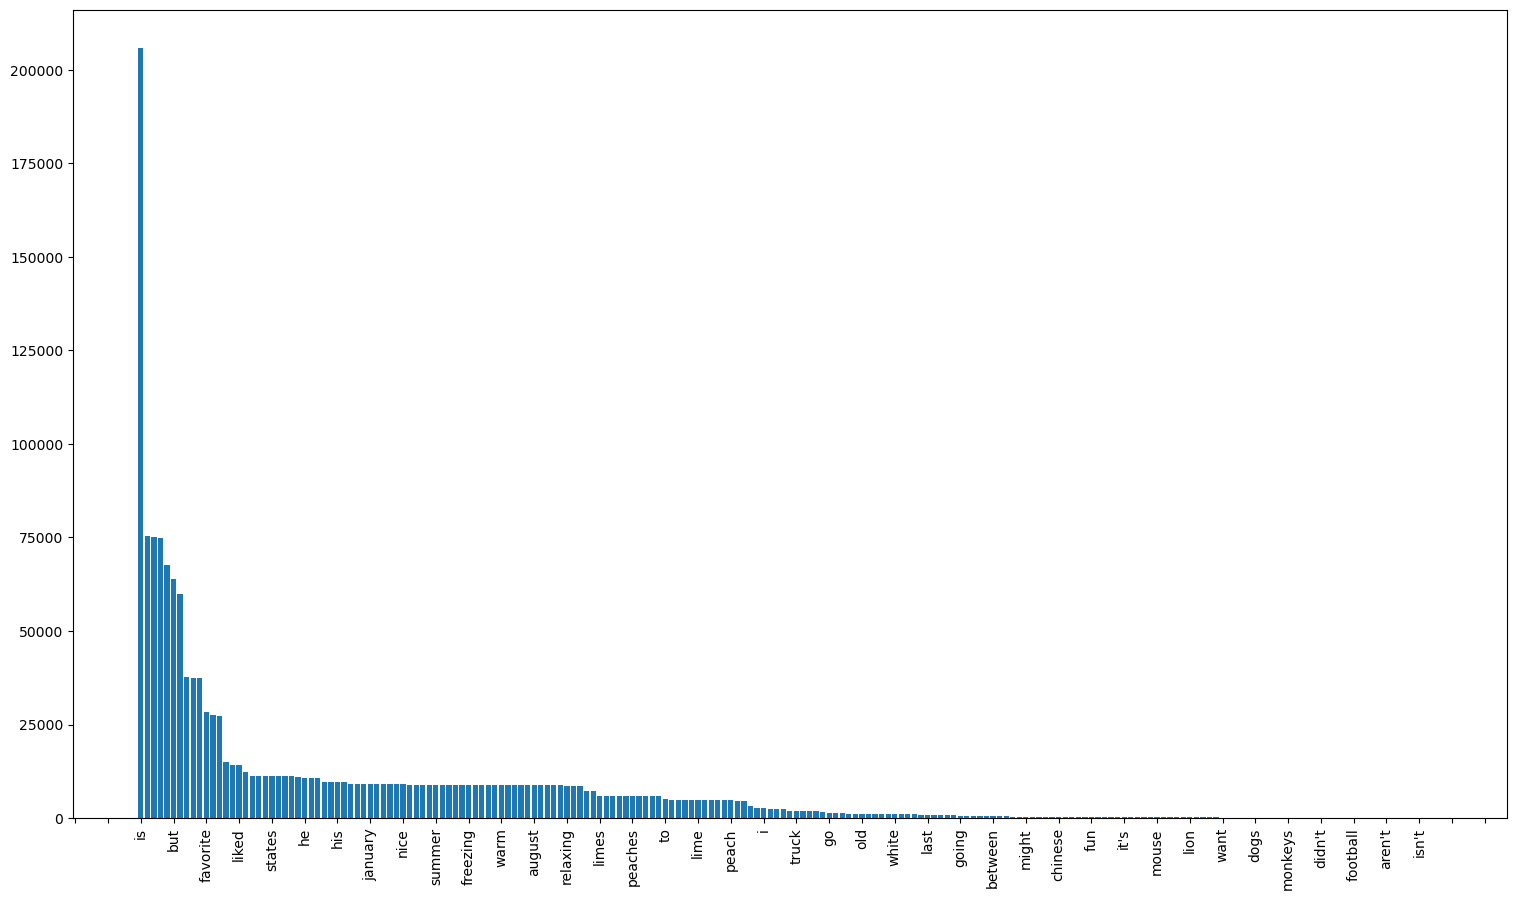

In [54]:
fig = plt.figure()
ax  = plt.gca()

ax.bar(x=english_words, height=english_counts)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90)

fig.set_size_inches(18.5, 10.5)

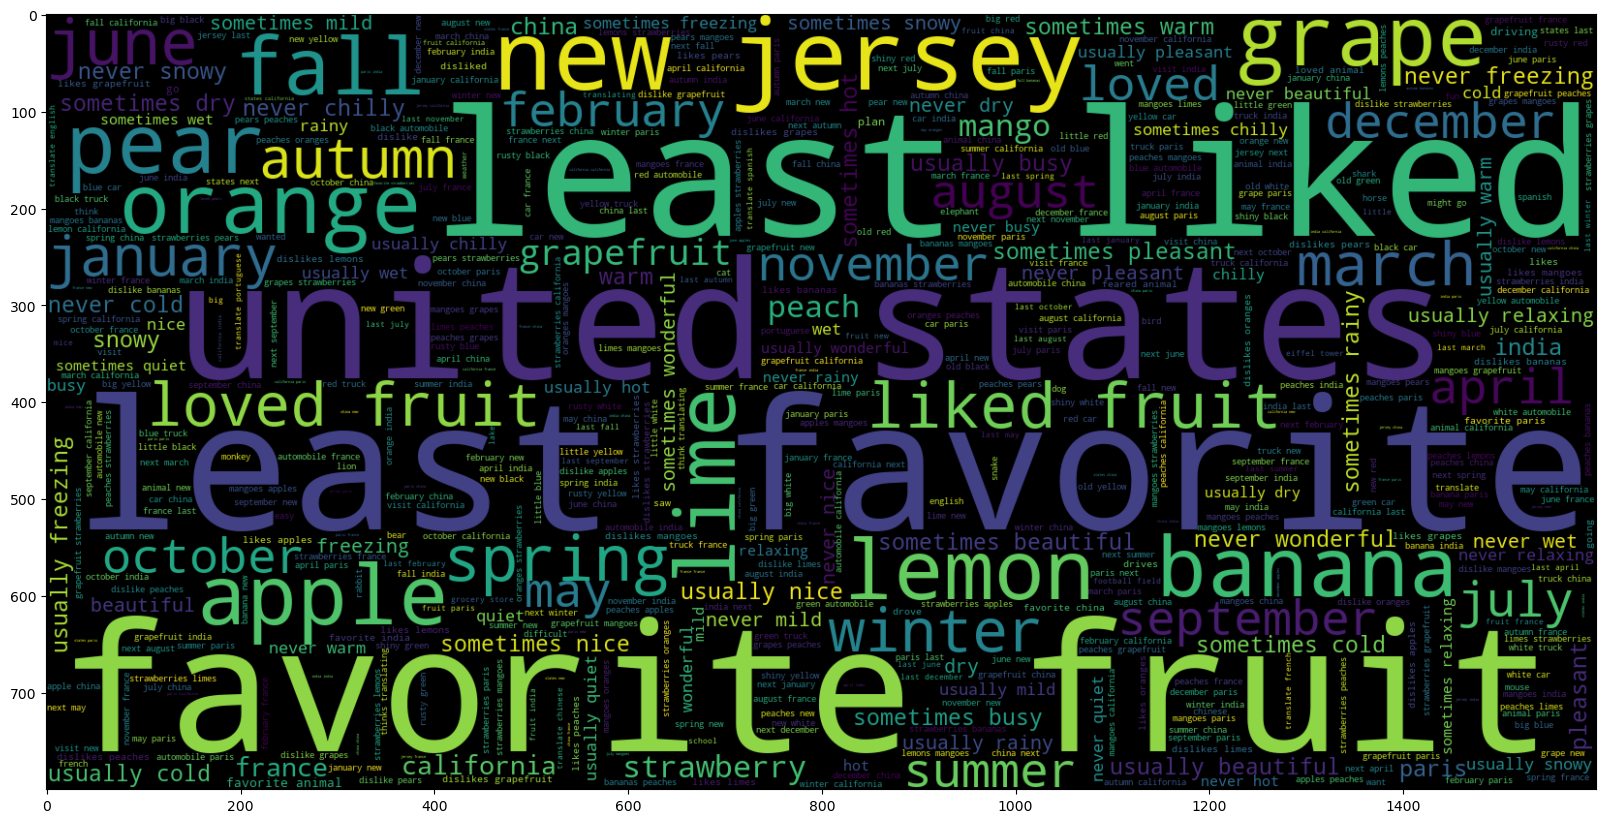

In [56]:
#WORD CLOUD

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [28]:
maxilen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxilen_english < len(tokens)):
        maxilen_english = len(tokens)
        
        
print("The maximum number of words in any document = ", maxilen_english)

The maximum number of words in any document =  15


In [30]:
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [62]:
french_words_counts = Counter(words)
french_words_counts

Counter({'est': 196809,
         'en': 105768,
         'il': 84079,
         'les': 65255,
         'mais': 63987,
         'et': 59851,
         'la': 49861,
         'parfois': 37746,
         'jamais': 37215,
         'le': 35306,
         "l'": 32917,
         'généralement': 31292,
         'moins': 27557,
         'aimé': 25852,
         'au': 25738,
         'fruit': 23626,
         'préféré': 23305,
         'agréable': 17751,
         'froid': 16794,
         'son': 16496,
         'chaud': 16405,
         'de': 15070,
         'plus': 14934,
         'automne': 14727,
         'mois': 14350,
         'à': 13870,
         'elle': 12056,
         'citrons': 11679,
         'paris': 11334,
         'inde': 11277,
         'états-unis': 11210,
         'france': 11170,
         'jersey': 11052,
         'new': 11047,
         'chine': 10936,
         'pendant': 10741,
         'pamplemousse': 10140,
         'mon': 9403,
         'votre': 9368,
         'juin': 9133,
         'p

In [64]:
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)
french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [66]:
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

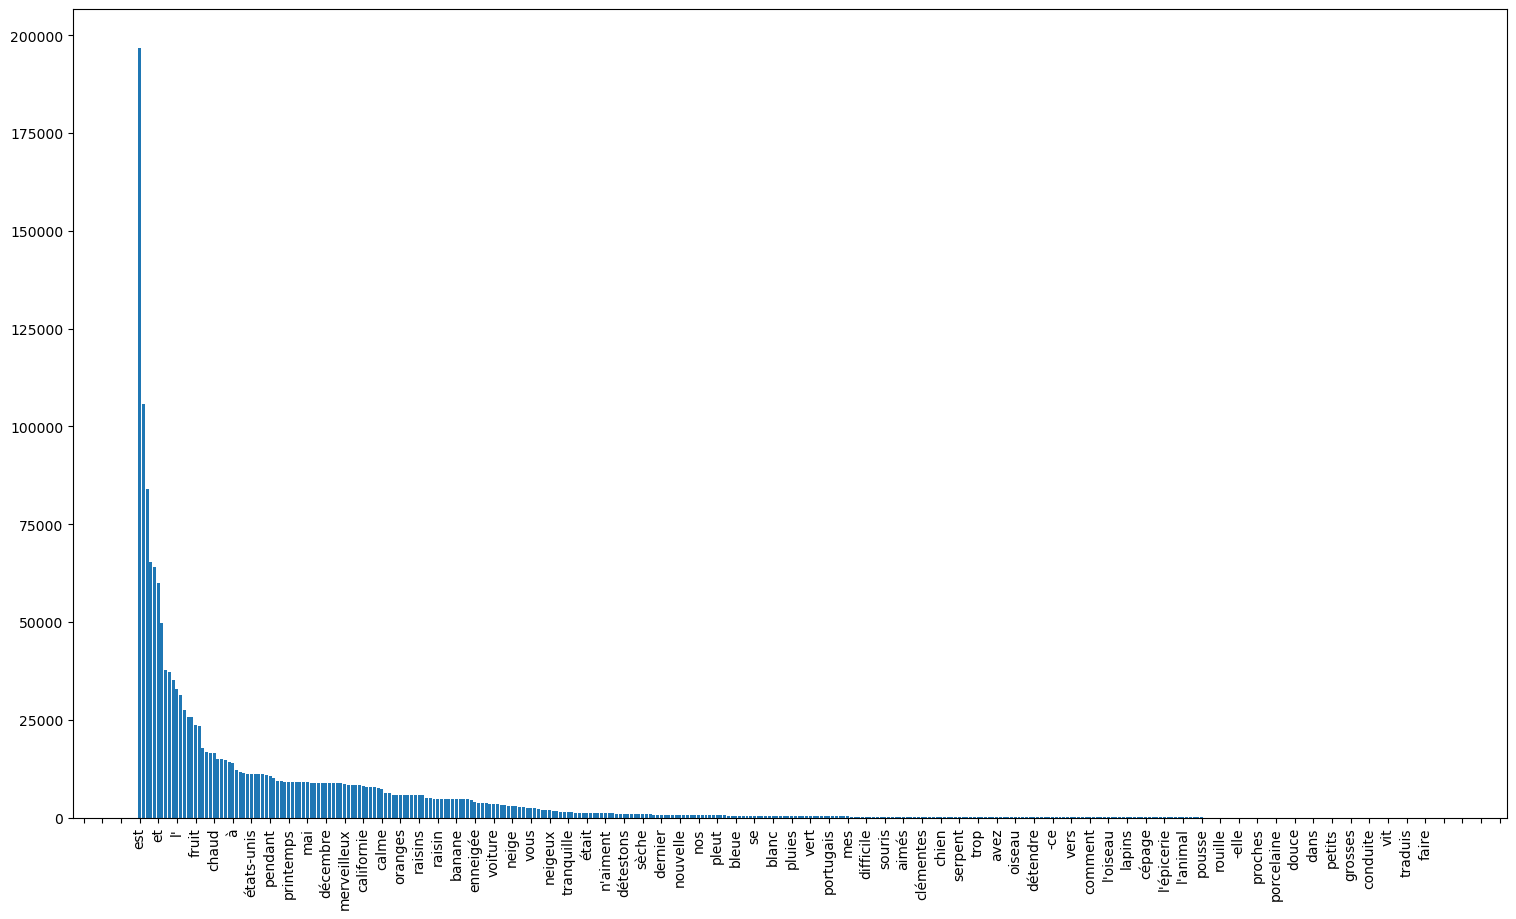

In [68]:
fig = plt.figure()
ax  = plt.gca()

ax.bar(x=french_words, height=french_counts)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90)

fig.set_size_inches(18.5, 10.5)

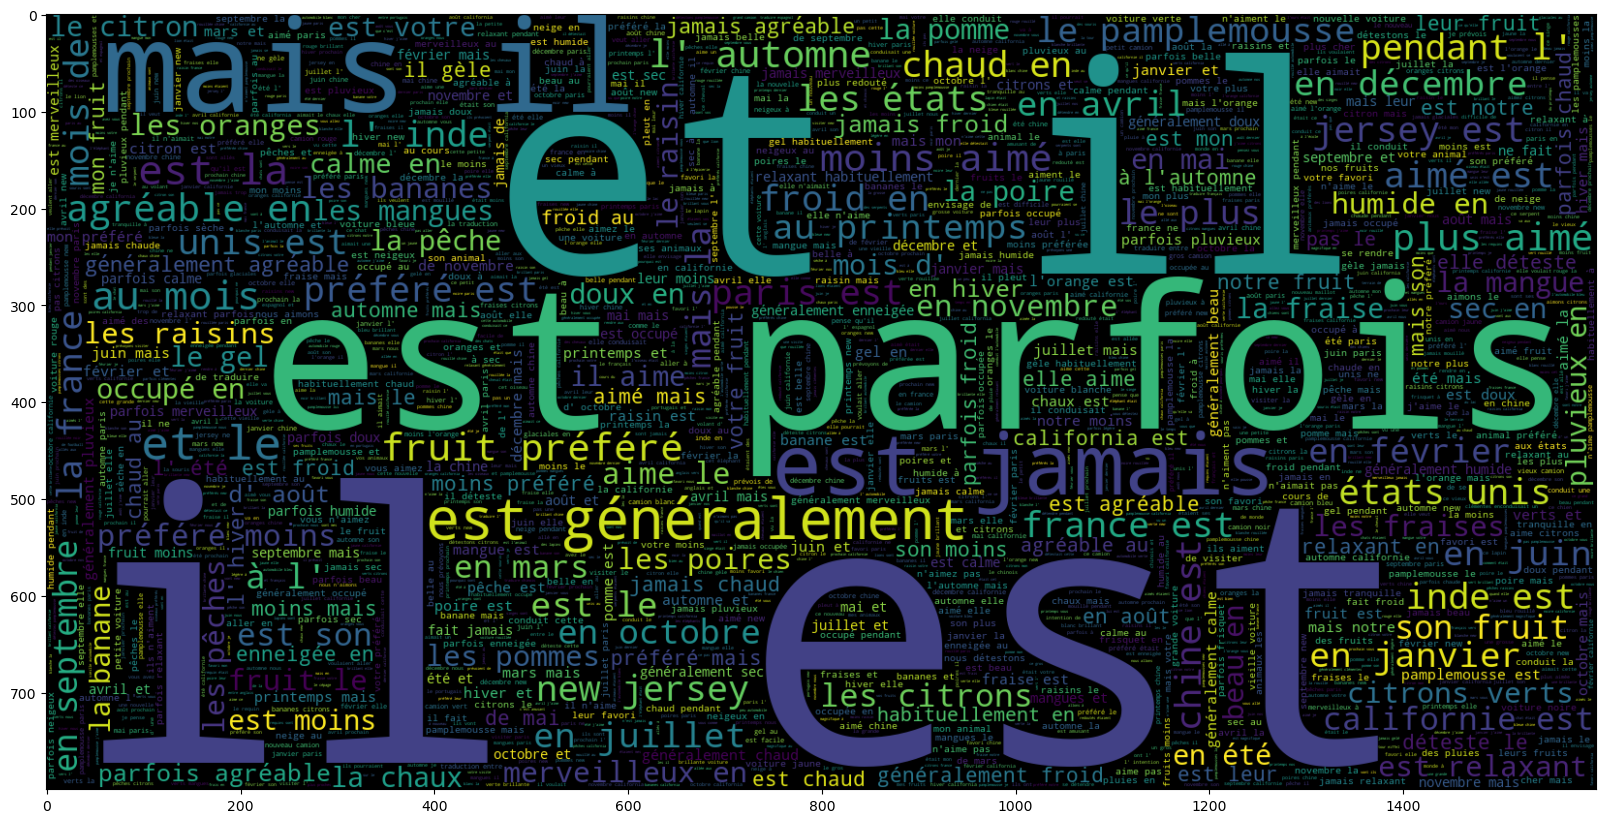

In [70]:
#WORD CLOUD

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [32]:
maxilen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxilen_french < len(tokens)):
        maxilen_french = len(tokens)
        
print("The maximum number of words(french) in any document = ", maxilen_french)

The maximum number of words(french) in any document =  23


In [34]:
def tokenize_and_pad(x, maxlen):
    
  # Tokenizer to tokenize the words and create sequences of tokenized words

  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)

  sequences = tokenizer.texts_to_sequences(x)
  #  make allsequences same size
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')

  return tokenizer, sequences, padded

In [36]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxilen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxilen_french)

In [38]:
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [40]:
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [87]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [89]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [42]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [44]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [50]:
# Sequential Model
model = Sequential()
input_length = maxilen_english
#model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxilen_english, mask_zero = True))

# encoder
model.add(LSTM(256))

# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxilen_french))
model.add(LSTM(256, return_sequences= True ))

model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, input_length))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 15, 256)             │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 23, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 23, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 23, 351)             │          90,207 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,192,031 (4.55 MB)

 Trainable params: 1,192,031 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense

# Define hyperparameters (adjust these as needed)
vocab_size = 200      # Size of the input vocabulary (for Embedding)
embedding_dim = 128     # Dimension of the embedding vectors
input_length = 15       # Length of input sequences
lstm_units = 64         # Number of units in LSTM layers
output_length = 20      # Length of output sequences (same as input for this example)
output_dim = 200     # Size of the output vocabulary (e.g., same as input vocab)

# Build the model
model = Sequential(name="sequential_7")

# Add layers matching the structure
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length, name="embedding_1"))
model.add(LSTM(units=lstm_units, return_sequences=False, name="lstm_1"))  # Encoder LSTM
model.add(RepeatVector(n=output_length, name="repeat_vector"))            # Repeat encoded vector
model.add(LSTM(units=lstm_units, return_sequences=True, name="lstm_2"))   # Decoder LSTM
model.add(TimeDistributed(Dense(units=output_dim, activation='softmax'), name="time_distributed"))  # Output layer

# Build the model by specifying an input shape (optional, but ensures params are calculated)
model.build(input_shape=(None, input_length))

# Print the model summary
model.summary()"""

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 15, 128)             │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 20, 200)             │          13,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,032 (472.78 KB)

 Trainable params: 121,032 (472.78 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [88]:
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.4613 - loss: 3.2629 - val_accuracy: 0.5464 - val_loss: 2.0991
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.5635 - loss: 1.9082 - val_accuracy: 0.6064 - val_loss: 1.5500
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.6197 - loss: 1.4746 - val_accuracy: 0.6484 - val_loss: 1.2970
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6635 - loss: 1.2338 - val_accuracy: 0.6912 - val_loss: 1.0921
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.7011 - loss: 1.0484 - val_accuracy: 0.7161 - val_loss: 0.9879
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7327 - loss: 0.9192 - val_accuracy: 0.7491 - val_loss: 0.8664
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7645 - loss: 0.8069 - val_accuracy: 0.7914 - val_loss: 0.7201
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8011 - loss: 0.6933 - val_accu

In [90]:
# save the model

model.save("weights.h5")

In [92]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [94]:
def pad_to_text(padded, tokenizer):
    
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in padded])

In [96]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - china is quiet during september but it is mild in april    

Original French word - chine est calme en septembre mais il est doux en avril            

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted French word - chine est agréable en mois mais il est il en en avril           




Original English word - france is usually warm during december and it is usually cold in july  

Original French word - la france est habituellement chaud en décembre et il est généralement froid en juillet         

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted French word - la france est généralement chaud en juin et il est généralement froid en juillet         




Original English word - she dislikes apples limes and grapes         

Original French word - elle déteste les pommes les citrons verts et les raisins             

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted French word - elle déteste les pommes les verts verts et les raisins             




Original English w